<a href="https://colab.research.google.com/github/catastropiyush/Itzpapalotl/blob/main/Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Differential Equations  : Day 1**

###**Instructor : ORCAkaKING**

##*ODE Solvers*



$$y(x+h)=y(x)+hy'(x)$$ \
**Explicit Euler**\
$$y_{n+1}=y_{n}+hf'(x_n,y_n)$$ \
**Implicit Euler**
$$y_{n+1}=y_{n}+hf'(x_{n+1},y_{n+1})$$


Differential Equation
$$y'=-4.25y$$
Solution$$y=e^{-4.25t}$$

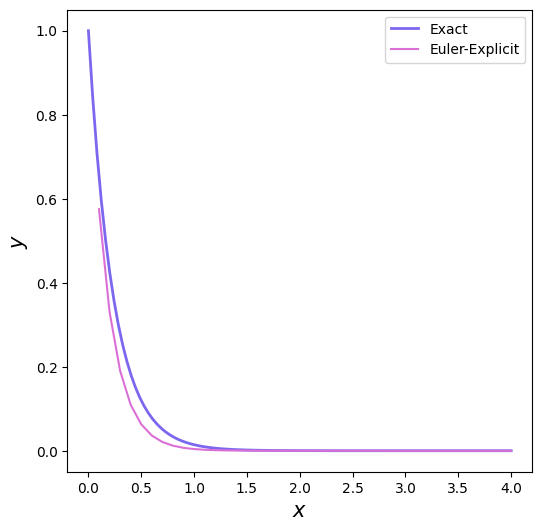

In [ ]:
#Last update:Piyush   8 Aug 2022
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,4,100)

def euler_explicit(f_prime, y_0, a, b, h): #defining the euler method
    N=int((b-a)/h)                         #Number of steps
    x = a ; y = y_0                        #Initial Values to the equation y(0) and x(0)
    x_out,y_out =[],[]
    for i in range(N):
        y = y + h*f_prime(x, y)            #y_n+1 = y_n + h * f
        x = x + h
        x_out.append(x)
        y_out.append(y)
    return x_out, y_out

def solution(x):
  return np.exp(-4.25*x)
def f_prime(x, y):
  return -4.25*y

x_euler, y_euler = euler_explicit(f_prime, 1, 0, 4, 0.1)  #call the function and store the values in x and y
#plt.xlim([0,2])#plt.ylim([0.7,1.1])
plt.figure(figsize=(6,6))
plt.plot(x,solution(x),linewidth=2.0,color='mediumslateblue',label='Exact')
plt.plot(x_euler,y_euler,linewidth=1.5,color='orchid',label='Euler-Explicit')
plt.xlabel(r'$x$',fontsize=15);plt.ylabel(r'$y$',fontsize=15)
plt.legend(loc='upper right')

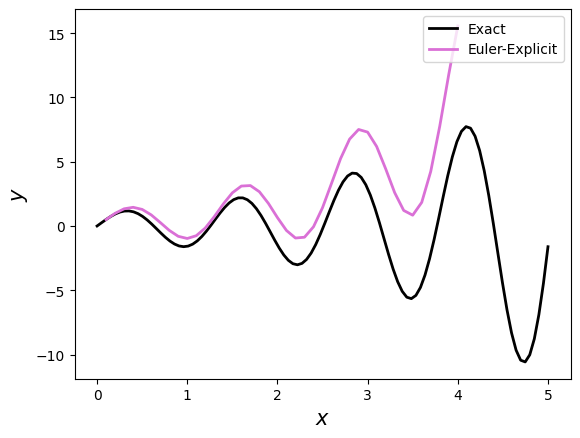

In [ ]:
x = np.linspace(0,5,100)
def euler_explicit(f_prime, y_0, a, b, h): #defining the euler method
    N=int((b-a)/h)                         #Number of steps
    x = a ; y = y_0                        #Initial Values to the equation y(0) and x(0)
    x_out,y_out =[],[]
    for i in range(N):
        y = y + h*f_prime(x, y)            #y_n+1 = y_n + h * f
        x = x + h
        x_out.append(x)
        y_out.append(y)
    return x_out, y_out

def solution(x):
  return np.exp(x/2)*np.sin(5*x)
def f_prime(x, y):
  return -0.5*np.exp(x/2)*np.sin(5*x)+5*np.exp(x/2)*np.cos(5*x)+y

x_euler, y_euler = euler_explicit(f_prime, 0, 0, 4, 0.1)  #call the function and store the values in x and y
#plt.figure(figsize=(6,6))
plt.plot(x,solution(x),linewidth=2.0,color='black',label='Exact')
plt.plot(x_euler,y_euler,linewidth=2.0,color='orchid',label='Euler-Explicit')
plt.xlabel(r'$x$',fontsize=15);plt.ylabel(r'$y$',fontsize=15)
plt.legend(loc='upper right')

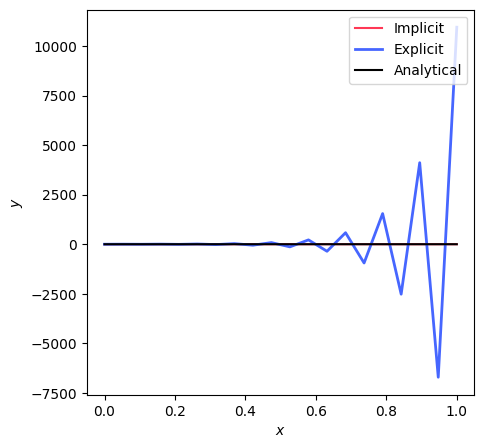

In [ ]:
#Euler Explicit and Euler Implicit
#Last update Piyush 10 Aug 2022
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 20)   #gridpoints

#Explicit Euler
def euler_explicit(x):
        y = np.zeros_like(x)  #empty array
        h = x[1] - x[0]       #step size
        for i in range(1, len(x)):
            y[i] = y[i-1] -50*h*(y[i-1] - np.cos(x[i]))
        return y
#Implicit Euler
def euler_implicit(x):
        y = np.zeros_like(x)    #empty array
        h = x[1] - x[0]         #step size
        for i in range(1, len(x)):
            y[i] = (y[i-1] + 50*h*np.cos(x[i])) / (50*h + 1)
        return y
def solution(x):
        return (50/2501)*(np.sin(x) + 50*np.cos(x)) - (2500/2501)*np.exp(-50*x)

plt.figure(figsize=(5,5))
plt.plot(x,euler_implicit(x),linewidth=1.5,color='#FF3855',label='Implicit')
plt.plot(x,euler_explicit(x),linewidth=2.0,color='#4666FF',label='Explicit')
plt.plot(x,solution(x),linewidth=1.5,color='#000000',label='Analytical')
plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
plt.legend(loc='upper right')

In [ ]:
#Error calculator
#Last update Piyush 17 Aug 2022
plt.figure(figsize=(7,6))
plt.plot(x,np.abs(solution(x)-euler_explicit(x)),color='orange',label='Explicit')
plt.plot(x,np.abs(solution(x)-euler_implicit(x)),color='deeppink',label='Implicit')
plt.xlabel(r'$x$')
plt.ylabel(r'$Error$')
plt.legend(loc='upper right')

**RK-4 method**

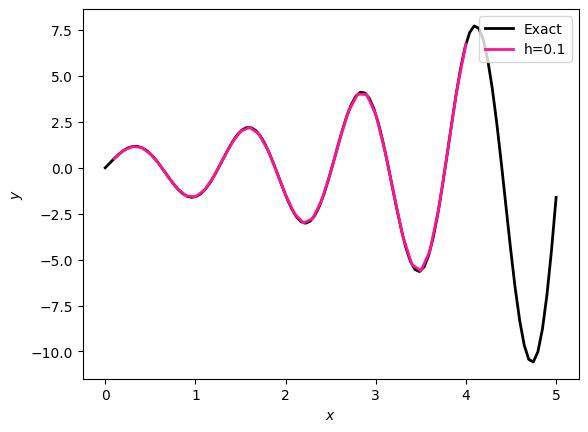

In [ ]:
#Last Update:Piyush
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 100)
def RK4(f_prime, y_0, a, b, h):
    N=int((b-a)/h)  #Number of steps
    x = a ; y = y_0
    x_out,y_out =[],[]
    for i in range(N):
        k1 = h*f_prime(x,y)
        k2 = h*f_prime(x+0.5*h,y+0.5*k1)
        k3 = h*f_prime(x+0.5*h,y+0.5*k2)
        k4 = h*f_prime(x+h,y+k3)

        y = y+ (1/6)*(k1+2*k2+2*k3+k4)   #RK-4
        x = x + h
        x_out.append(x)
        y_out.append(y)
    return x_out, y_out
def solution(x):
  return np.exp(x/2)*np.sin(5*x)
def f_prime(x, y):
  return -0.5*np.exp(x/2)*np.sin(5*x)+5*np.exp(x/2)*np.cos(5*x)+y
x_RK, y_RK = RK4(f_prime, 0, 0, 4, 0.1)
#x_RK1, y_RK1 = RK4(f_prime, 0, 0, 4, 0.1)

plt.xlabel(r'$x$');plt.ylabel(r'$y$')
#plt.ylim([-1.5,1.5])
plt.plot(x,solution(x),color='black',linewidth=2.0,label='Exact')
plt.plot(x_RK,y_RK,color='deeppink',linewidth=2.0,label='h=0.1')
#plt.plot(x_RK1,y_RK1,color='orange',linewidth=2.0,label='h=0.01')
plt.legend(loc='upper right')

#**Solving the beast:**
$$\frac{dy}{dx}=-50(y-cos(x)) $$

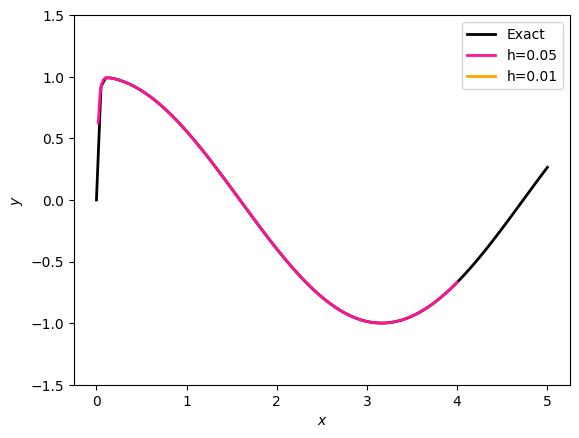

In [ ]:
#Last Update:Piyush 9 Aug 2022
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 100)

def RK4(f_prime, y_0, a, b, h):
    N=int((b-a)/h)  #Number of steps
    x = a ; y = y_0
    x_out,y_out =[],[]
    for i in range(N):
        k1 = h*f_prime(x,y)
        k2 = h*f_prime(x+0.5*h,y+0.5*k1)
        k3 = h*f_prime(x+0.5*h,y+0.5*k2)
        k4 = h*f_prime(x+h,y+k3)

        y = y+ (1/6)*(k1+2*k2+2*k3+k4)   #RK-4
        x = x + h
        x_out.append(x); y_out.append(y)
    return x_out, y_out

def f_prime(x, y):  #Differential equation
  return 50*(np.cos(x)-y)
def solution(x):    #Analytical solution
  return (50/2501)*(np.sin(x)+50*np.cos(x)-50*np.exp(-50*x))  #y(0)=0

x_RK, y_RK = RK4(f_prime, 0, 0, 4, 0.02)
x_RK1, y_RK1 = RK4(f_prime, 0, 0, 4, 0.5)

plt.xlabel(r'$x$');plt.ylabel(r'$y$')
plt.ylim([-1.5,1.5])
plt.plot(x,solution(x),color='black',linewidth=2.0,label='Exact')
plt.plot(x_RK,y_RK,color='deeppink' ,linewidth=2.0,label='h=0.05')
plt.plot(x_RK1,y_RK1,color='orange' ,linewidth=2.0,label='h=0.01')
plt.legend(loc='upper right')

[[100.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.]
 [100.  30.  30.  30.   0.]]


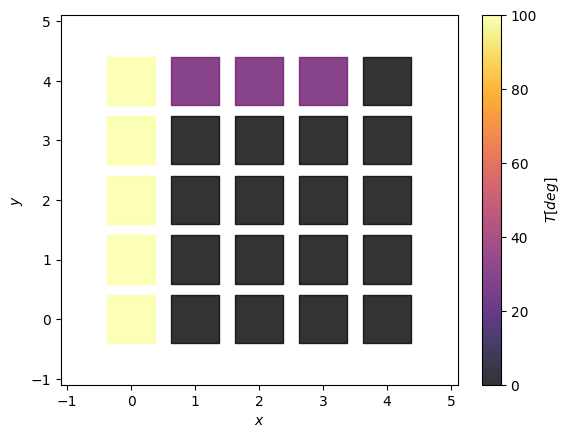

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 0              #max iter  #Set Dimension and delta
lenX = lenY = 5
delta = 1
#Boundary condition
Ttop      = 30; Tbottom   = 0; Tleft     = 100; Tright    = 0  #Trandom   = 100
Tguess = 0   #Intial guess for internal grid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
T = np.empty((lenX, lenY))
T.fill(Tguess)

for m in range(0,lenX):
 T[(lenY-1):, :]   = Ttop
 T[:1, :]          = Tbottom
 T[:, (lenX-1):]   = Tright
 T[:, :1]          = Tleft
Tcen,Tcen1=[],[]
for k in range(0,N):
    Tcen.append(T[1][1])
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
print(T)

x1 = np.linspace(0,N,N)
print(x1)
plt.xlabel('$Iteration [N]$');plt.ylabel(r'$T[deg]$')
plt.plot(x1,Tcen,linewidth=2.0,color='orchid',label=r'$T[1][1]$')
plt.legend()


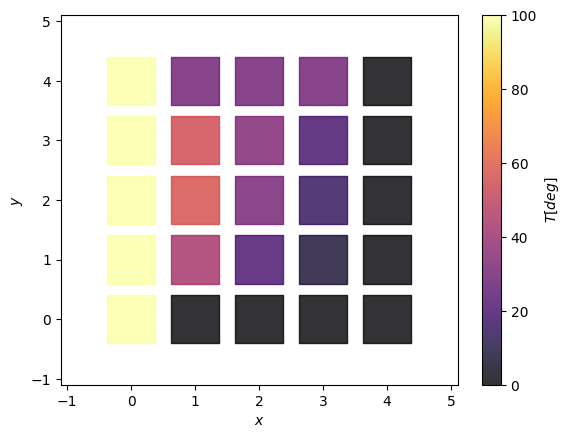

In [ ]:
plt.ylim([-1.1,5.1])
plt.xlim([-1.1,5.1])
plt.scatter(X,Y,c=T,marker='s',s=1200.0,alpha=0.8,cmap=plt.cm.inferno)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar(label=r'$T[deg]$')

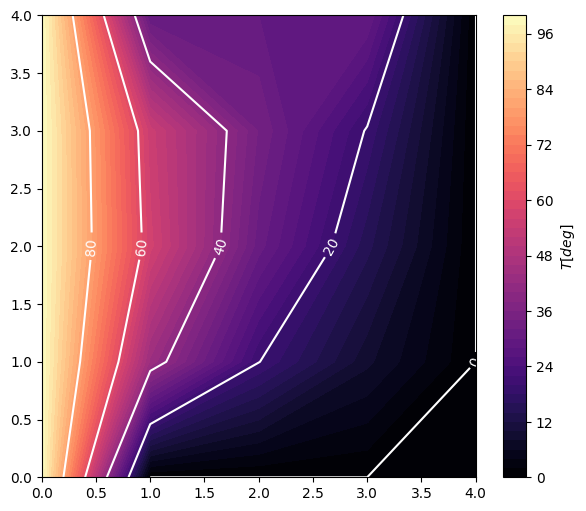

In [ ]:
plt.figure(figsize=(7,6))
contours = plt.contour(X, Y, T, 5,colors='white') # 5 contours
plt.clabel(contours, inline=True, fontsize=10.0)
plt.contourf(X, Y, T, 60, cmap=plt.cm.magma)
plt.colorbar(label=r'$T [deg]$')

##**Integration Algorithms**

*Trapezoid Rule*

$$\int_a^b f(x) dx \approx \frac{h}{2} \left(f(x_0) + 2 \left(\sum_{i=1}^{n-1} f(x_i)\right) + f(x_n)\right)
 $$

*Simpson's Rule*

$$\int_a^b f(x) dx \approx \frac{h}{3} \left[f(x_0)+4 \left(\sum_{i=1, i\  {\text{odd}}}^{n-1}f(x_i)\right)+2 \left(\sum_{i=2, i\  {\text{even}}}^{n-2}f(x_i)\right)+f(x_n)\right].$$


I_s = 0.21769547325102875
I_t = 0.22283950617283949
Error_I_s= -0.21769547325102875
Error_I_t= -0.22283950617283949


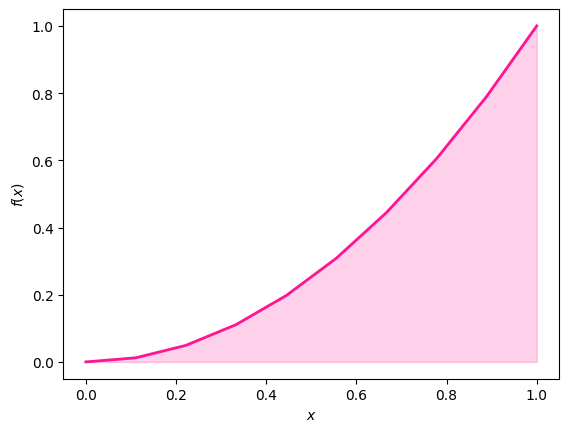

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = 0 ; b =1
h = 0.1
n = int((b-a)/(h))
x = np.linspace(a, b, n)

#f = 5*x**3-3*x**2+2*x+1
f  = x**2
I_simp  = (h/3)*(f[0] + 4*sum(f[1:n-1:2]) + 2*sum(f[:n-2:2])+f[n-1])
I_trap  = (h/2)*(f[0] + 2*sum(f[1:n-2:1]) + f[n-1])
I_ana    = 0.0

err_simp =  I_ana - I_simp
err_trap =  I_ana - I_trap

plt.plot(x,f,color='deeppink',linewidth=2.0,label='f(x)')
plt.fill_between(x, f, 0, color='deeppink', alpha=.2)

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
print('I_s =',I_simp)
print('I_t =',I_trap)
print('Error_I_s=',err_simp)
print('Error_I_t=',err_trap)

#**Differential Equations : Day 2**